# UnSupervised Machine Learning

In [4]:
import os
os.chdir("C:\\Users\\dell\\Desktop\\python\\python_files_given_for_workout")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset_cluster = pd.read_csv("Mall_Customers.csv")
dataset_cluster

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
#slicing the data to identify the best customer

In [7]:
x = dataset_cluster.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#building model

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    #init = centroid initialization
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


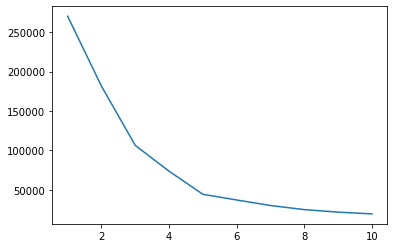

In [11]:
plt.plot(range(1,11),wcss)

In [12]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25095.703209997544,
 21862.09267218289,
 19634.554629349972]

In [14]:
kmeans = KMeans(n_clusters =5, init = "k-means++")
y_kmeans = kmeans.fit_predict(x)

In [15]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [17]:
pd.concat([dataset_cluster, pd.DataFrame(y_kmeans)],axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


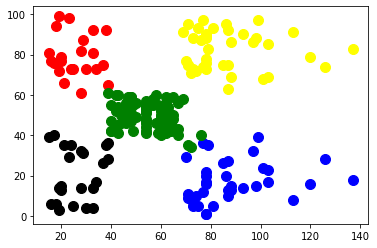

In [20]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="blue",label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="yellow",label="cluster3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c="black",label="cluster4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c="green",label="cluster5")

In [21]:
import os
os.chdir("C:\\Users\\dell\\Desktop\\python\\python_files_given_for_workout")

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
dataset_cluster = pd.read_csv("Mall_Customers.csv")
dataset_cluster

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#hierarchial cluster

Text(0, 0.5, 'Euclidean Distances Method')

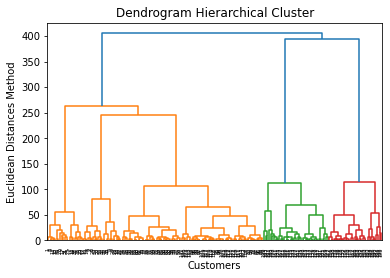

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = "ward"))
#ward-pair/connecter
plt.title("Dendrogram Hierarchical Cluster")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances Method")

In [29]:
from sklearn.cluster import AgglomerativeClustering
#algorithm - Agglomerative clustering
#Bottom-up concept
hie_cluster = AgglomerativeClustering(n_clusters=5,affinity="euclidean", linkage="ward")
#affinity - approach is distance formula
hie_cluster

AgglomerativeClustering(n_clusters=5)

In [30]:
y_hc = hie_cluster.fit_predict(x)

In [28]:
y_hc

array([ 4,  1,  8,  1,  4,  1,  8,  1,  8,  1,  8,  1,  8,  1,  8,  1,  4,
        1,  4,  1,  4,  1,  8,  1,  8,  1,  4,  1,  4,  1,  8,  1,  8,  1,
        8,  1,  8,  1,  4,  1,  4,  1,  4,  7,  4,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  6,  6,  7,  6,  7,  6,  6,  7,  7,  6,
        7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  9, 10,  3, 10,  9,  5,  3,  5,  3, 10,  3,  5,  9,
        5,  3,  5,  3,  5,  9, 10,  9,  5,  9, 10,  3,  5,  9,  5,  9,  5,
        3,  5,  9,  5,  3,  5,  3, 10,  9,  5,  9,  5,  3,  5,  9,  5,  3,
        5,  3,  5,  9,  5,  9,  5,  3,  5,  0,  2,  0,  5,  0,  2,  0,  2,
        3,  2,  0,  2,  3,  2,  0,  2,  0,  2,  0,  2,  0], dtype=int64)

In [31]:
pd.concat([dataset_cluster, pd.DataFrame(y_hc)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


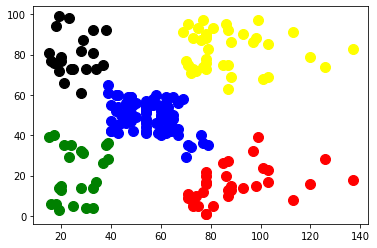

In [32]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c="blue",label="cluster2")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c="yellow",label="cluster3")
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c="black",label="cluster4")
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c="green",label="cluster5")

In [ ]:
#association ruleminig


In [33]:
import os
os.chdir("C:\\Users\\dell\\Desktop\\python\\python_files_given_for_workout")

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dataset.shape

(7501, 20)

In [38]:
transactions = []
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

In [39]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [45]:
#Building market basket analysis by "apriori" algorithm
from apyori import apriori

In [43]:
!pip install apyori

In [46]:
!pip install apriori

  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2484 sha256=7ff340ab00bd95ca42dec9c771b7511ab8167d50a622446b720a29feaf93bf38
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5b\68\dc\04db1838d64a3011a9b737e6f458894dc1f5cbadd128d54c1c
Successfully built apriori


In [47]:
rules = apriori(transactions,min_support = 0.003, min_confidence = 0.2, min_lift=1, min_length=2)

In [48]:
rules

<generator object apriori at 0x0000018753E4F970>

In [49]:
results = list(rules)

In [50]:
results

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.9998666844420744, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9998666844420744, lift=1.0)]),
 RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'chocolate', 'almonds'}), support=0.005999200106652446, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'chocolate'}), confidence=0.29411764705882354, lift=1.7950988369310295)]),
 RelationRecord(items=frozenset({'eggs', 'almonds'}), suppo